# Bidirectional
* RNN으로 진행한 후 역으로 다시 훈련을 시키는 방법
* 1개의 데이터셋으로 2번 훈련 시키는 효과를 누림
* LSTM의 2배의 파리미터를 잡기 때문에 약 2배 정도 느려짐.
* 아직 하리퍼파라미터 튜닝이 충분히 안되고, 훈련수도 적어서 정확한 결과는 아님

## 1. 데이터

In [1]:
import numpy as np

* x_train의 컬럼과 y_train의 벡터의 크기를 맞추기 위해 x_train을 reshape 한다.
* __(행, 열, 피쳐)__ == __(샘플수, 타임스탭, 피쳐)__ 같은 용어!
    * x_train : (3행, 5열, 1feature) , y_train : (3, )
    * x의 행의 수 = y의 벡터 크기 = 1
    * x_train의 행의 수 = y_train 의 벡터 크기 = 3
    * [1,2,3,4,5] -> [6] 으로 처리되는 모델 훈련 

In [2]:
x_train = np.array([[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7]])
print("x_train.shape : ", x_train.shape) 
y_train = np.array([6,7,8])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print("x_train.shape : ", x_train.shape) 
print("y_train.shape : ", y_train.shape) 

x_train.shape :  (3, 5)
x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)


## 2. 모델 구성

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional

* 첫 번째 히든 레이어의 파라미터 수가 LSTM에서 252개 였던것에 비해 정확히 2배 증가 
* 출력 노드 수 : 처음 출력 노드 수
* __input_shape(5,1)__ : 2 차원 
    - 5 : x의 컬럼 수
    - 1 : 연산을 할 때 몇 개씩 데이터를 묶어 연산하는지(지금의 경우엔 1개씩)
* __(5,1) == (None, 5, 1)__ 같은 의미
    - None : 행
    - 5 : 열
    - 1 : 몇 개씩 잘랐는지.. 

In [4]:
model = Sequential()
model.add(Bidirectional(LSTM(7, activation='relu'), input_shape = (5,1)))  # 7은 output node 수
model.add(Dense(4))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 14)                504       
_________________________________________________________________
dense (Dense)                (None, 4)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 569
Trainable params: 569
Non-trainable params: 0
_________________________________________________________________


## 3. 훈련

In [5]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x_train, y_train, epochs=100, batch_size=1)

Train on 3 samples
Epoch 1/100
3/3 [==============================] - 1s 375ms/sample - loss: 26.6484 - mse: 26.6484
Epoch 2/100
3/3 [==============================] - 0s 8ms/sample - loss: 25.1472 - mse: 25.1472
Epoch 3/100
3/3 [==============================] - 0s 8ms/sample - loss: 23.1717 - mse: 23.1717
Epoch 4/100
3/3 [==============================] - 0s 7ms/sample - loss: 21.5741 - mse: 21.5741
Epoch 5/100
3/3 [==============================] - 0s 7ms/sample - loss: 19.6106 - mse: 19.6106
Epoch 6/100
3/3 [==============================] - 0s 7ms/sample - loss: 17.8127 - mse: 17.8127
Epoch 7/100
3/3 [==============================] - 0s 7ms/sample - loss: 15.9795 - mse: 15.9795
Epoch 8/100
3/3 [==============================] - 0s 7ms/sample - loss: 14.2687 - mse: 14.2687
Epoch 9/100
3/3 [==============================] - 0s 7ms/sample - loss: 12.2951 - mse: 12.2951
Epoch 10/100
3/3 [==============================] - 0s 7ms/sample - loss: 10.4731 - mse: 10.4731
Epoch 11/100
3/3 [

3/3 [==============================] - 0s 7ms/sample - loss: 0.7442 - mse: 0.7442
Epoch 87/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.7233 - mse: 0.7233
Epoch 88/100
3/3 [==============================] - 0s 6ms/sample - loss: 0.7086 - mse: 0.7086
Epoch 89/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.6981 - mse: 0.6981
Epoch 90/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.6801 - mse: 0.6801
Epoch 91/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.6836 - mse: 0.6836
Epoch 92/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.6628 - mse: 0.6628
Epoch 93/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.6462 - mse: 0.6462
Epoch 94/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.6368 - mse: 0.6368
Epoch 95/100
3/3 [==============================] - 0s 7ms/sample - loss: 0.6176 - mse: 0.6176
Epoch 96/100
3/3 [==============================] - 0s 7ms/samp

## 4. 학습과정확인

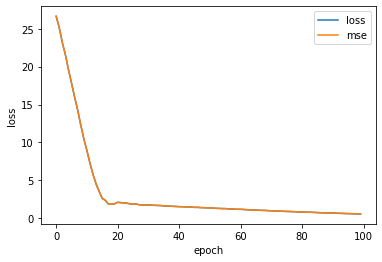

In [6]:
import matplotlib.pyplot as plt
# print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
# #plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show()

## 5. 평가 예측
* 예측값 데이터로 사용하기 위해 모양을 맞춰줘야 한다. 

In [7]:
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape) #(1, 5)
x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print(x_predict.shape)

(1, 5)
(1, 5, 1)


In [8]:
y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

예측값 :  [[10.144601]]
